Import Libraries

In [79]:
import pandas as pd
import matplotlib as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import shap 


loans = pd.read_csv('../data/loan_approval_dataset.csv')
# First check to see if any NAs
loans.isna().any()

loan_id                      False
 no_of_dependents            False
 education                   False
 self_employed               False
 income_annum                False
 loan_amount                 False
 loan_term                   False
 cibil_score                 False
 residential_assets_value    False
 commercial_assets_value     False
 luxury_assets_value         False
 bank_asset_value            False
 loan_status                 False
dtype: bool

In [80]:
loans.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [81]:
# Convert the Loan Status into 0s and 1s
loans.columns 

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [82]:
loans.columns = loans.columns.str.strip()

In [83]:
loans['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [84]:
loans['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [85]:
loans['loan_status'] = loans['loan_status'].str.strip()

In [86]:
loans['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

In [87]:
loans['loan_status'] = loans['loan_status'].map({'Approved':1,'Rejected':0})

In [88]:
loans['loan_status'].value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [89]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 433.7+ KB


LabelEncoding now

In [91]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['self_employed','education'] 

encoders = {}

for col in label_cols:
    encoder = LabelEncoder()
    loans[col] = loans[col].astype(str).str.strip()
    loans[col] = encoder.fit_transform(loans[col])
    encoders[col] = encoder



In [92]:
loans.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [93]:
X = loans.drop(['loan_id','loan_status'],axis=1)
y = loans['loan_status']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [95]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, preds))


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.84      0.62      0.71       432
           1       0.78      0.92      0.84       636

    accuracy                           0.80      1068
   macro avg       0.81      0.77      0.78      1068
weighted avg       0.80      0.80      0.79      1068

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       432
           1       0.98      0.99      0.99       636

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



In [96]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

In [97]:
import shap 

explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_test)

X_test.columns

shap_values_class_1 = shap_values[:, :, 1] 




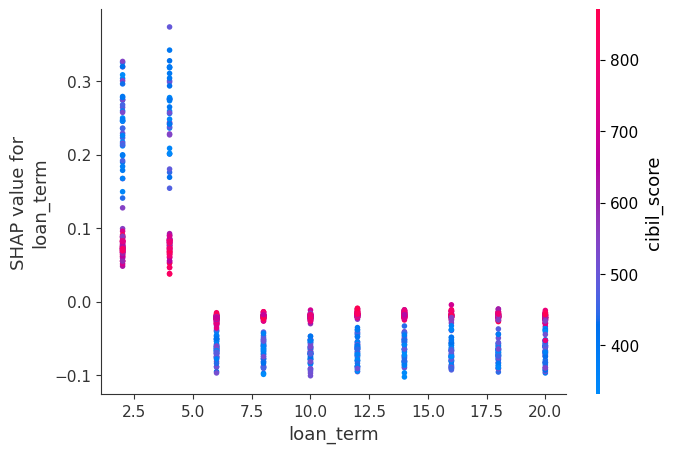

In [98]:
# dependency plot
shap.dependence_plot("loan_term",shap_values_class_1,X_test)

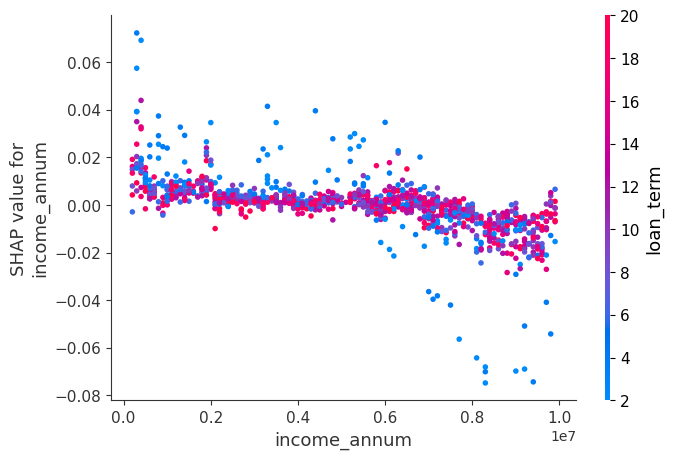

In [99]:
shap.dependence_plot("income_annum", shap_values_class_1, X_test)

In [100]:
# Using SHAP to explain an individual prediction
shap_row = shap_values_class_1[5]         
features_row = X_test.iloc[5]              
base_value = explainer.expected_value[1]          

# SHAP Explanation object
explanation = shap.Explanation(
    values=shap_row,
    base_values=base_value,
    data=features_row.values,
    feature_names=features_row.index.tolist()
)

# Plot the SHAP force explanation
shap.plots.force(explanation)

In [101]:
import joblib

joblib.dump(rf, "rf_model.pkl")

['rf_model.pkl']

In [124]:
X_test.iloc[5]
y_test.iloc[5]

1

In [126]:
X_test.iloc[5]

no_of_dependents                   5
education                          0
self_employed                      0
income_annum                 8000000
loan_amount                 27000000
loan_term                         20
cibil_score                      595
residential_assets_value     4500000
commercial_assets_value      5200000
luxury_assets_value         24800000
bank_asset_value            10400000
Name: 2782, dtype: int64

In [136]:
y_test.iloc[10]

0

In [138]:
X_test.iloc[10]

no_of_dependents                   2
education                          0
self_employed                      1
income_annum                 9400000
loan_amount                 37300000
loan_term                         14
cibil_score                      383
residential_assets_value     7800000
commercial_assets_value     15900000
luxury_assets_value         27100000
bank_asset_value             7700000
Name: 2740, dtype: int64